In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')



## Import Dataset url = https://www.kaggle.com/datasets/mirichoi0218/insurance


In [2]:
df = pd.read_csv('/Users/emrekaya/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## The distribution of Bmi (Body Mass Index)

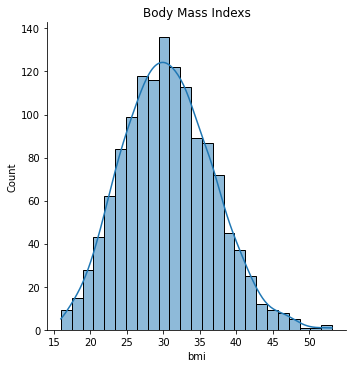

In [4]:
sns.displot(data=df, x=df["bmi"], kde=True).set(title = "Body Mass Indexs")

## The relationship between “smoker” and “charges”

[Text(0.5, 1.0, 'Smoker and Charges')]

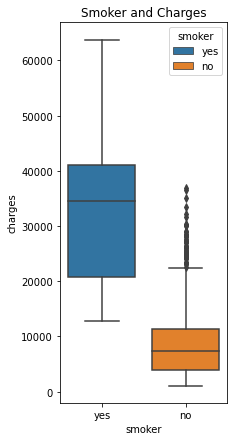

In [5]:
fig, ax = plt.subplots(figsize=(3,7))
sns.boxplot(data=df, x="smoker", y="charges", hue="smoker", dodge=False).set(title = "Smoker and Charges")

## The relationship between “smoker” and “region”

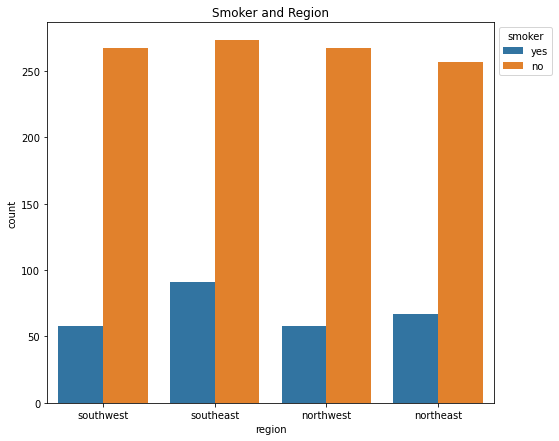

In [6]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x='region',data=df, hue="smoker").set(title = "Smoker and Region")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## The relationship between “bmi” and “sex”

[Text(0.5, 1.0, 'Bmi and sex')]

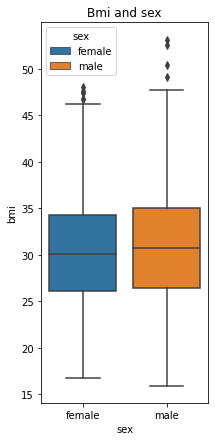

In [7]:
fig, ax = plt.subplots(figsize=(3,7))
sns.boxplot(data=df, x="sex", y="bmi", hue="sex", dodge=False).set(title = "Bmi and sex")


## The "region" with the most "children"

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

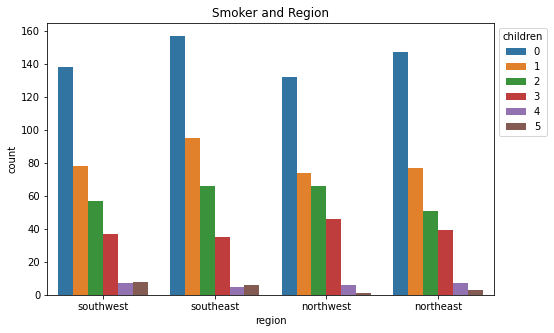

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='region',data=df, hue="children").set(title = "Smoker and Region")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
c_d= df.groupby(['region'])['children'].sum()
c_d


## The relationship between “age” and “bmi”

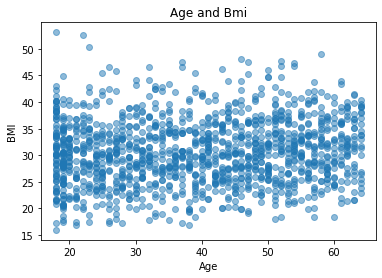

In [9]:
plt.scatter(data=df, x="age", y="bmi", alpha=0.5)
plt.title("Age and Bmi")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

## The relationship between “bmi” and “children”.

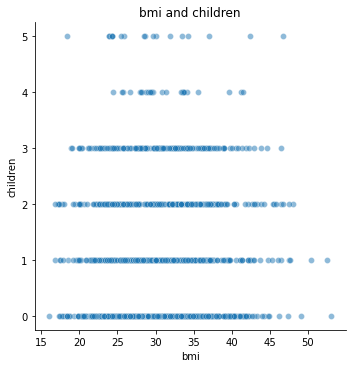

In [10]:
sns.relplot(data=df, x="bmi", y="children", alpha=0.5).set(title = "bmi and children")

## The outlier in the "bmi" variable

[Text(0.5, 1.0, 'bmi')]

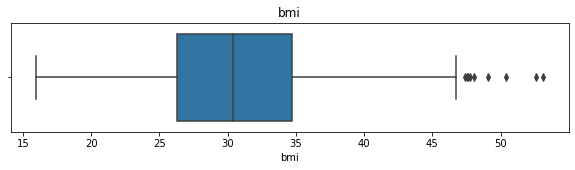

In [11]:
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(x=df['bmi']).set(title = "bmi")

In the above graph, we can clearly see that values approximately above 48 are acting as the outliers

## The relationship between “bmi” and “charges”

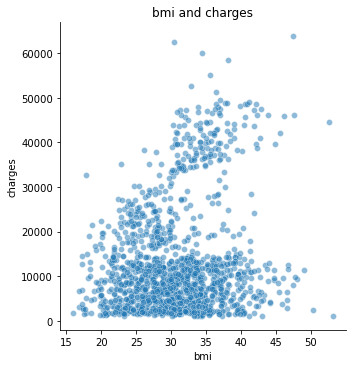

In [12]:
sns.relplot(data=df, x="bmi", y="charges", alpha=0.5).set(title = "bmi and charges")

## The relationship between “region”, “smoker” and “bmi” using bar plot

[Text(0.5, 1.0, ' region, smoker and bmi ')]

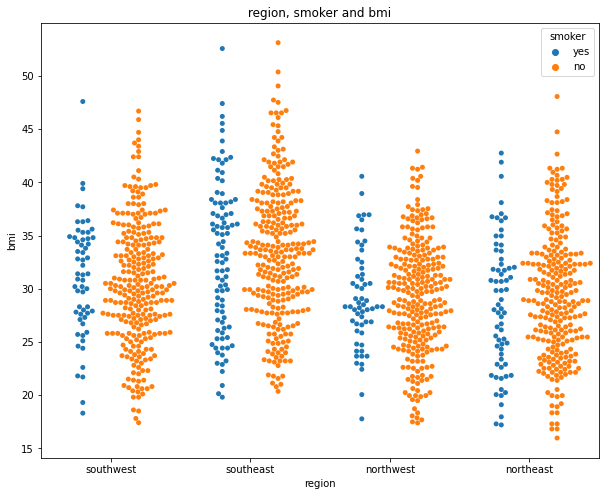

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=df, x="region", y="bmi", hue="smoker", dodge=True).set(title = " region, smoker and bmi ")

## Label Encoder 

In [14]:
#label encoder famale = 0 / male = 1 
lab = LabelEncoder()
df['sex'] = lab.fit_transform(df['sex'])
df['smoker'] = lab.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## One-Hot Encoding region

In [15]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())
final_df = df.join(encoder_df)
final_df.drop('region', axis=1, inplace=True)
final_df.columns = ['age', 'sex', 'bmi', 'children', "smoker" , "charges", "N_E", "N_W", "S_E", "S_W"]
final_df.head()

,age,sex,bmi,children,smoker,charges,N_E,N_W,S_E,S_W
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


## Normalizing

In [16]:
X = final_df.drop(columns=["charges"])
y = final_df["charges"]
X["bmi"] = X["bmi"]  / X["bmi"].abs().max()
X["age"] = X["age"]  / X["age"].abs().max()
X["children"] = X["children"]  / X["children"].abs().max()


## Spliting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)

In [18]:
print(f"X_train len = {len(X_train)}")
print(f"X_test len = {len(X_test)}")
print(f"y_train len = {len(y_train)}")
print(f"y_test len = {len(y_test)}")


X_train len = 1070
X_test len = 268
y_train len = 1070
y_test len = 268


## Linear Regression

In [19]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
print(f"Linear Regression score = {Lin_reg.score(X_test, y_test)}")

Linear Regression score = 0.7821051185951509


## Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)
print(f"Ridge Regression score = {Ridge.score(X_test, y_test)}")

Ridge Regression score = 0.7833526563652874


## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, y_train)
print(f"Lasso Regression score = {Lasso.score(X_test, y_test)}")

Lasso Regression score = 0.7835861186275916


## Random Forest Regressor

In [22]:
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))
      

MSE train data: 3480745.447, MSE test data: 21175418.760
R2 train data: 0.976, R2 test data: 0.864


## Feature importance ranking

<BarContainer object of 9 artists>

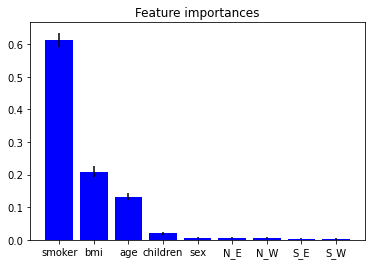

In [23]:
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', "N_E", "N_W", "S_E", "S_W"]
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
   # print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="b", yerr=std[indices], align="center")

## Polynomial Regression

In [24]:
X = final_df.drop(['charges','sex',"N_E", "N_W", "S_E", "S_W"], axis = 1)
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)
y_train_pred = Pol_reg.predict(X_train)
y_test_pred = Pol_reg.predict(X_test)
print(f"Polynomial Regression score = {Pol_reg.score(X_test, y_test)}")

Polynomial Regression score = 0.8812595703345242


## Evaluating the performance of the algorithm

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776313
Mean Squared Error: 18895160.09878018
Root Mean Squared Error: 4346.856346692421


## Test Data Predicted

In [26]:
y_test_pred = Pol_reg.predict(X_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
